In [2]:
from scipy.io import loadmat
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.stats import ttest_ind

In [3]:
#data loading
data = np.array(loadmat('E.mat')['E'])

In [4]:
face =  data[:9,:]  
nonface = data[9:,:]

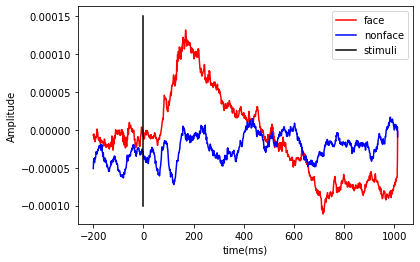

In [5]:
# ploting raw data
plt.plot(range(-200,1014),face[5],color = 'red')
plt.plot(range(-200,1014),nonface[20],color = 'b')
plt.xlabel('time(ms)')
plt.ylabel('Amplitude')
plt.plot([0,0],[-0.00010,0.00015],color = 'black')
plt.legend(['face','nonface','stimuli'])

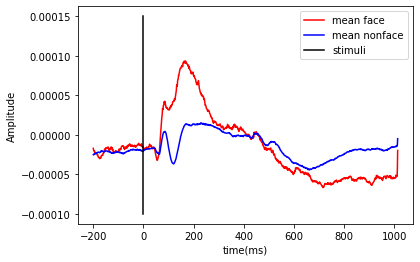

In [6]:
mean_face = face.mean(axis = 0)
mean_nonface = nonface.mean(axis = 0)
plt.plot(range(-200,1014),mean_face,color = 'red')
plt.plot(range(-200,1014),mean_nonface,color = 'b')
plt.xlabel('time(ms)')
plt.ylabel('Amplitude')
plt.plot([0,0],[-0.00010,0.00015],color = 'black')
plt.legend(['mean face','mean nonface','stimuli'])

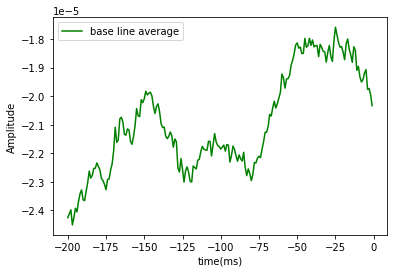

In [7]:
base_line_average = data[:,:200].mean(axis = 0)
plt.plot(range(-200,0),base_line_average,color = 'g')
plt.xlabel('time(ms)')
plt.ylabel('Amplitude')
plt.legend(['base line average'])

In [8]:
def power(signal):
    power = (1.0/len(signal))*sum([s**2 for s in signal])
    return power
power_bline = power(base_line_average)
print('Base line Power is:',power_bline)

Base line Power is: 4.4077057461733435e-10


In [9]:
effective_time = 200+300
faca = face[:,200:effective_time]
nonface = nonface[:,200:effective_time]


In [10]:
diff_power_face = np.array([power(sample)-power_bline for sample in face])
diff_power_nonface = np.array([power(sample)-power_bline for sample in nonface])

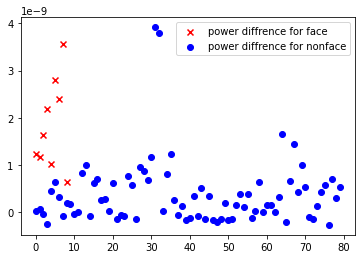

In [11]:
plt.scatter(range(len(face)),diff_power_face,color = 'red',marker = 'x')
plt.scatter(range(len(nonface)),diff_power_nonface,color = 'blue',marker = 'o')
plt.legend(['power diffrence for face','power diffrence for nonface'])

In [12]:
ttest_ind(diff_power_face,diff_power_nonface)

Ttest_indResult(statistic=5.749620174998636, pvalue=1.301718317098247e-07)

C:\Users\ramzi\AppData\Local\Temp\ipykernel_4464\3154412772.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f[:10],z1[:10,:],cmap='hot',vmax=6e-11)
C:\Users\ramzi\AppData\Local\Temp\ipykernel_4464\3154412772.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f[:10],z2[:10,:],cmap='hot',vmax=6e-11)


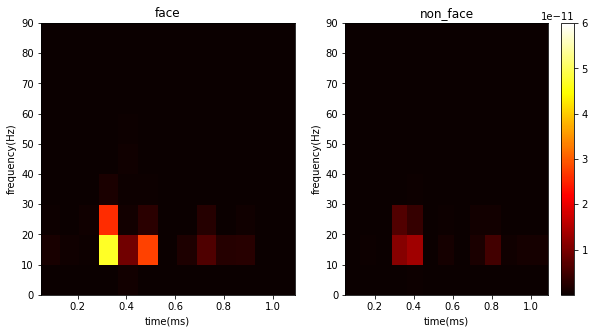

In [36]:
from scipy import signal 
plt.figure(figsize = (10,5))
f,t,z1 = signal.spectrogram(mean_face,fs = 1000,nperseg=100,noverlap=20)
plt.subplot(1,2,1)
plt.pcolormesh(t,f[:10],z1[:10,:],cmap='hot',vmax=6e-11)
plt.xlabel('time(ms)')
plt.ylabel('frequency(Hz)')
plt.title('face')
f,t,z2 = signal.spectrogram(mean_nonface,fs = 1000,nperseg=100,noverlap=20)
plt.subplot(1,2,2)
plt.pcolormesh(t,f[:10],z2[:10,:],cmap='hot',vmax=6e-11)
plt.xlabel('time(ms)')
plt.ylabel('frequency(Hz)')
plt.title('non_face')
plt.colorbar()
plt.show()




In [33]:
z1.max()

4.710560066275568e-11

In [29]:
z1.max(),z2.max()

(4.710560066275568e-11, 1.3572366080131846e-11)